# The Kaldor facts

In 1957, Kaldor summarized a set of facts for developed economies. Although none of them are exactly true, they are nonetheless pretty true, and a good theory of economic development should be able to account for them.

1. The rate of growth of GDP per capita is constant.
2. The ratio of the total capital stock to GDP is constant.
3. The shares of labor and capital income in GDP are constant.
4. The average rate of return on capital is constant.

# The Kaldor facts in the data

This Python notebook loads the Penn world table (using this [nice package](https://github.com/spring-haru/pwtdata)) and analyzes the Kaldor facts.

Why do we do this? The course does not require any programming skills, so this topic is strictly speaking beyond the scope of the course. But I think it is important to see the actual data a little bit, even in a theory heavy course such as this one. With pretty minimal skills, you should be able to adapt the code to show graphs for other countries as well.

I should also admit that I think a little bit of Python programming should show up in most courses, so feel free to dismiss this a light form of [anti-Excel propaganda](https://www.bbc.com/news/magazine-22223190).

In [1]:
import matplotlib.pyplot as plt #Load a plotting package
import numpy as np #Load a math package

import pwtdata #Package for downloading the data
pwt = pwtdata.load()
print(pwt)

      countrycode   country   currency_unit  year         rgdpe         rgdpo  \
0             ABW     Aruba  Aruban Guilder  1950           NaN           NaN   
1             ABW     Aruba  Aruban Guilder  1951           NaN           NaN   
2             ABW     Aruba  Aruban Guilder  1952           NaN           NaN   
3             ABW     Aruba  Aruban Guilder  1953           NaN           NaN   
4             ABW     Aruba  Aruban Guilder  1954           NaN           NaN   
...           ...       ...             ...   ...           ...           ...   
12371         ZWE  Zimbabwe       US Dollar  2013  28086.937500  28329.810547   
12372         ZWE  Zimbabwe       US Dollar  2014  29217.554688  29355.759766   
12373         ZWE  Zimbabwe       US Dollar  2015  30091.923828  29150.750000   
12374         ZWE  Zimbabwe       US Dollar  2016  30974.292969  29420.449219   
12375         ZWE  Zimbabwe       US Dollar  2017  32693.474609  30940.816406   

             pop       emp 

Let's extract the data for Sweden.

__Suggested homework:__ Take this code (I will put it up online) and change it so that it shows the results for, e.g., Denmark.

In [3]:
swe = pwt[pwt['countrycode'] == 'SWE']
swe

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,delta_k
10404,SWE,Sweden,Swedish Krona,1950,69103.531250,64180.968750,7.024569,3.464073,1989.310791,2.317562,...,-0.243112,0.014574,0.103256,0.118413,0.089240,0.090176,0.075169,0.137952,NaN,NaN
10405,SWE,Sweden,Swedish Krona,1951,73437.335938,66140.445312,7.083483,3.462243,1980.430054,2.331609,...,-0.306835,0.010112,0.116855,0.136283,0.104062,0.122808,0.086739,0.159409,NaN,0.034661
10406,SWE,Sweden,Swedish Krona,1952,73061.875000,66744.304688,7.135403,3.457488,1980.430054,2.345740,...,-0.272849,0.004736,0.127266,0.143366,0.119772,0.123928,0.092812,0.177121,NaN,0.036596
10407,SWE,Sweden,Swedish Krona,1953,75378.148438,69190.625000,7.182262,3.454662,1960.694824,2.359958,...,-0.241478,0.008621,0.128884,0.141470,0.120432,0.116884,0.091864,0.174264,NaN,0.037939
10408,SWE,Sweden,Swedish Krona,1954,79878.195312,72871.750000,7.224354,3.451470,1971.549194,2.374261,...,-0.263828,0.003473,0.131313,0.137356,0.119724,0.117303,0.092322,0.168112,1.000371,0.038718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10467,SWE,Sweden,Swedish Krona,2013,418630.437500,398669.281250,9.615247,4.678945,1608.718262,3.376093,...,-0.572322,0.033109,1.309127,1.204919,1.812940,0.770217,0.700683,1.241777,1.024805,NaN
10468,SWE,Sweden,Swedish Krona,2014,421025.843750,397589.812500,9.689376,4.734018,1609.422852,3.386003,...,-0.585221,0.039818,1.257267,1.213162,1.841840,0.773016,0.696733,1.195970,1.026311,NaN
10469,SWE,Sweden,Swedish Krona,2015,448244.593750,411178.125000,9.763565,4.789832,1610.072021,3.395941,...,-0.521096,0.045303,1.024129,1.024132,1.490345,0.706391,0.630403,0.981605,0.898144,NaN
10470,SWE,Sweden,Swedish Krona,2016,454602.156250,412173.906250,9.837533,4.847548,1626.459106,3.405908,...,-0.527816,0.047476,1.043351,1.039255,1.528102,0.697424,0.629494,0.972549,0.877980,NaN


Ok, so it looks like we managed to extract a bunch of observations for Sweden. Good, let's continue. What variables do we have in our data?

In [4]:
swe.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k', 'delta_k'],
      dtype='object')

I also printed all the column names. Some of them, such as 'country' and 'year' are not too difficult to guess what they mean. For the rest, go look at the [documentation](https://www.rug.nl/ggdc/productivity/pwt/) (at this link, you can also download the data set as an Excel or Stata file as well).

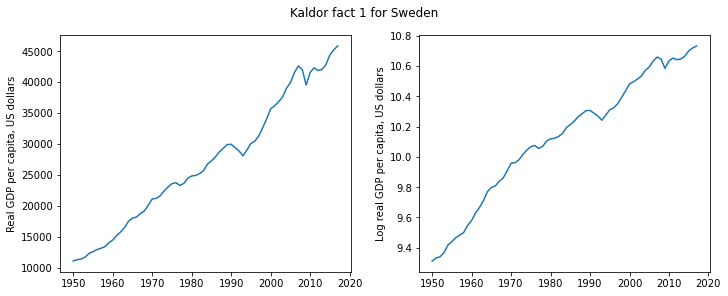

In [5]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10,4))
fig.suptitle("Kaldor fact 1 for Sweden")
axs[0].plot(swe['year'], swe['rgdpna']/swe['pop'])
axs[1].plot(swe['year'], np.log(swe['rgdpna']/swe['pop']))
axs[0].set_ylabel('Real GDP per capita, US dollars')
axs[1].set_ylabel('Log real GDP per capita, US dollars')

plt.show()

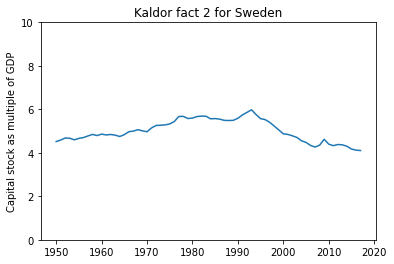

In [6]:
plt.title("Kaldor fact 2 for Sweden")
plt.plot(swe['year'], swe['rnna']/swe['rgdpna'])
plt.ylabel('Capital stock as multiple of GDP')
plt.ylim([0, 10])
plt.show()

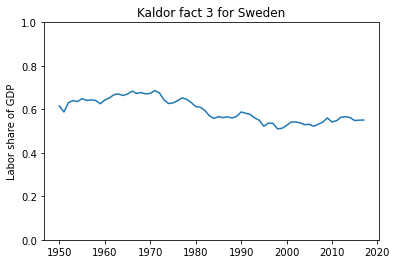

In [7]:
plt.title("Kaldor fact 3 for Sweden")
plt.plot(swe['year'], swe['labsh'])
plt.ylabel('Labor share of GDP')
plt.ylim([0, 1])
plt.show()

It used to be a super-robust fact that the labor share was constant. Lately, it has however been trending down in many countries. See [Karabarbounis and Neiman 2014](https://academic.oup.com/qje/article-abstract/129/1/61/1899422). Why is the labor share falling? We will touch on some theories later in the course.

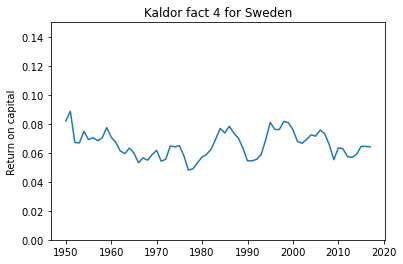

In [8]:
plt.title("Kaldor fact 4 for Sweden")
plt.plot(swe['year'], swe['irr'])
plt.ylabel('Return on capital')
plt.ylim([0, 0.15])
plt.show()

Kaldor facts: Hold up well for Sweden